In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
plt.rcParams["figure.figsize"] = (10,3)

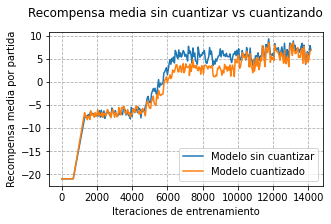

In [5]:
rwd_avg_dequant = pd.read_csv("quant_error_results/model1/results_dequant_500ep.csv")
rwd_avg_quant = pd.read_csv("quant_error_results/model1/results_quant_500ep.csv")
plt.plot(rwd_avg_dequant["Num iters"], rwd_avg_dequant["Rwd avg"], label = "Modelo sin cuantizar")
plt.plot(rwd_avg_quant["Num iters"], rwd_avg_quant["Rwd avg"], label = "Modelo cuantizado")
plt.title("Recompensa media sin cuantizar vs cuantizando", pad=15, x = 0.46)
plt.legend()
plt.xlabel("Iteraciones de entrenamiento")
plt.ylabel("Recompensa media por partida")
plt.tight_layout(pad=0.3)
plt.grid(linestyle='--')
#plt.savefig('TFMplots/avg_reward_dequant_vs_quant_model1.pdf')
plt.show()

### Mean relative error in outputs and anch-disp measure

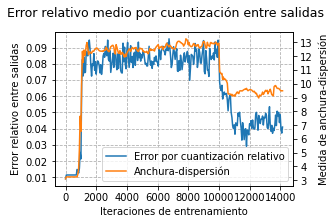

In [6]:
mean_rel_error_model1_10000 = pd.read_csv("quant_error_results/model1/quant_error_500ep.csv")
fig,ax = plt.subplots()
plt.title("Error relativo medio por cuantización entre salidas", size = 12.5, pad = 15, x = 0.465)
ax.plot(mean_rel_error_model1_10000["Num iters"], mean_rel_error_model1_10000["Mean rel error"], label = "Error por cuantización relativo")
ax.set_xlabel("Iteraciones de entrenamiento")
ax.set_ylabel("Error relativo entre salidas", labelpad=5)
ax.set_xticks(np.arange(0, 14001, 2000))
ax.set_yticks(np.arange(0.01, 0.091, 0.01))
ax2=ax.twinx()
std_weights_model1 = pd.read_csv("quant_error_results/model1/width-disp_weights.csv")
ax2.plot(std_weights_model1["Num iters"], std_weights_model1["weights concentration"], color="tab:orange", label = "Anchura-dispersión")
ax2.set_ylabel("Medida de anchura-dispersión", labelpad=5)
ax2.set_yticks(np.arange(3, 14))
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2)
plt.tight_layout(pad=0.3)
ax.grid(linestyle='--')
#plt.savefig('TFMplots/error_quant_rel_model1.pdf')
plt.show()

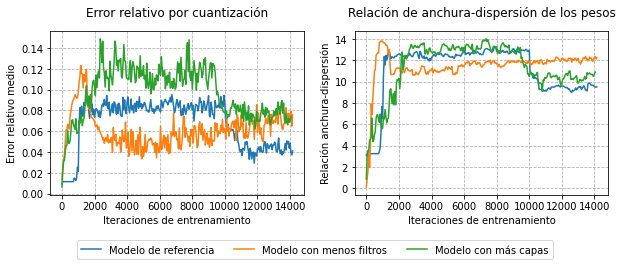

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)
mean_rel_error_model1_10000 = pd.read_csv("./quant_error_results/model1/quant_error_500ep.csv")
line1, = ax1.plot(mean_rel_error_model1_10000["Num iters"], mean_rel_error_model1_10000["Mean rel error"], label = "Modelo de referencia")
mean_rel_error_model2_10000 = pd.read_csv("./quant_error_results/model2/quant_error_500ep.csv")
line2, = ax1.plot(mean_rel_error_model2_10000["Num iters"], mean_rel_error_model2_10000["Mean rel error"], label = "Modelo con menos filtros")
mean_rel_error_model2_10000 = pd.read_csv("./quant_error_results/model3/quant_error_500ep.csv")
line3, = ax1.plot(mean_rel_error_model2_10000["Num iters"], mean_rel_error_model2_10000["Mean rel error"], label = "Modelo con más capas")
ax1.set_title("Error relativo por cuantización", pad=15)
ax1.set_ylabel("Error relativo medio")
ax1.set_xlabel("Iteraciones de entrenamiento")
ax1.grid(linestyle='--')

width_disp_model1 = pd.read_csv("./quant_error_results/model1/width-disp_weights.csv")
ax2.plot(width_disp_model1["Num iters"], width_disp_model1["weights concentration"], label = "Referencia")
width_disp_model2 = pd.read_csv("./quant_error_results/model2/width-dispersion_weights.csv")
ax2.plot(width_disp_model2["Num iters"], width_disp_model2["weights concentration"], label = "Con menos filtros")
width_disp_model3 = pd.read_csv("./quant_error_results/model3/width-dispersion_weights.csv")
ax2.plot(width_disp_model3["Num iters"], width_disp_model3["weights concentration"], label = "Con más capas")
ax2.set_title("Relación de anchura-dispersión de los pesos", pad=15)
ax2.set_xlabel("Iteraciones de entrenamiento")
ax2.set_ylabel("Relación anchura-dispersión")
ax2.grid(linestyle='--')
lines = [line1, line2, line3]
ax1.legend(lines, [line.get_label() for line in lines], bbox_to_anchor=(2, -0.25), ncol = 3)
#plt.savefig('TFMplots/error-width-disp-quant_archs.pdf', bbox_inches='tight')
plt.show()

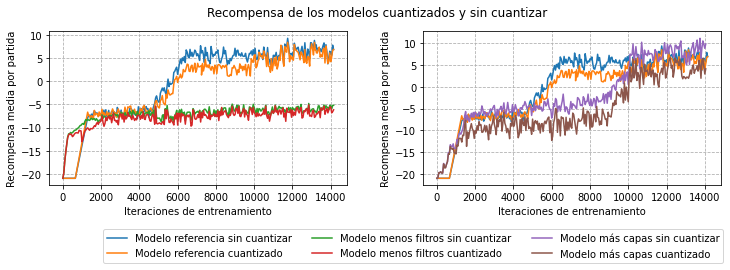

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
rwd_avg_dequant_model1 = pd.read_csv("quant_error_results/model1/results_dequant_500ep.csv")
rwd_avg_quant_model1 = pd.read_csv("quant_error_results/model1/results_quant_500ep.csv")
line1, = ax1.plot(rwd_avg_dequant_model1["Num iters"], rwd_avg_dequant_model1["Rwd avg"], label = "Modelo referencia sin cuantizar")
line2, = ax1.plot(rwd_avg_quant_model1["Num iters"], rwd_avg_quant_model1["Rwd avg"], label = "Modelo referencia cuantizado")
rwd_avg_dequant_model2 = pd.read_csv("quant_error_results/model2/results_dequant_500ep.csv")
rwd_avg_quant_model2 = pd.read_csv("quant_error_results/model2/results_quant_500ep.csv")
line3, = ax1.plot(rwd_avg_dequant_model2["Num iters"], rwd_avg_dequant_model2["Rwd avg"], label = "Modelo menos filtros sin cuantizar")
line4, = ax1.plot(rwd_avg_quant_model2["Num iters"], rwd_avg_quant_model2["Rwd avg"], label = "Modelo menos filtros cuantizado")
ax1.set_title("Recompensa de los modelos cuantizados y sin cuantizar", pad=15, x = 1.1)
ax1.set_xlabel("Iteraciones de entrenamiento")
ax1.set_ylabel("Recompensa media por partida")
plt.tight_layout(pad=0.3)
ax1.grid(linestyle='--')

ax2.plot(rwd_avg_dequant_model1["Num iters"], rwd_avg_dequant_model1["Rwd avg"])
ax2.plot(rwd_avg_quant_model1["Num iters"], rwd_avg_quant_model1["Rwd avg"])
rwd_avg_dequant_model3 = pd.read_csv("quant_error_results/model3/results_dequant_500ep.csv")
rwd_avg_quant_model3 = pd.read_csv("quant_error_results/model3/results_quant_500ep.csv")
line5, = ax2.plot(rwd_avg_dequant_model3["Num iters"], rwd_avg_dequant_model3["Rwd avg"], color = "tab:purple", label = "Modelo más capas sin cuantizar")
line6, = ax2.plot(rwd_avg_quant_model3["Num iters"], rwd_avg_quant_model3["Rwd avg"], color = "tab:brown", label = "Modelo más capas cuantizado")
ax2.set_xlabel("Iteraciones de entrenamiento")
ax2.set_ylabel("Recompensa media por partida")
ax2.set_yticks(np.arange(-20, 11, 5))
plt.tight_layout(pad=0.3)
ax2.grid(linestyle='--')
lines = [line1, line2, line3, line4, line5, line6]
ax1.legend(lines, [line.get_label() for line in lines], bbox_to_anchor=(2.28, -0.25), ncol = 3)
#plt.savefig('TFMplots/avg_reward_dequant_vs_quant_archs.pdf', bbox_inches='tight')
plt.show()